<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/Anomaly_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
import requests
import re
import seaborn as sns
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ตัวอย่าง CPU

In [2]:
cpu = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv")

In [3]:
cpu

,timestamp,value
0,2014-02-14 14:30:00,1.732
1,2014-02-14 14:35:00,1.732
2,2014-02-14 14:40:00,1.960
3,2014-02-14 14:45:00,1.732
4,2014-02-14 14:50:00,1.706
...,...,...
4027,2014-02-28 14:05:00,1.762
4028,2014-02-28 14:10:00,1.972
4029,2014-02-28 14:15:00,1.732
4030,2014-02-28 14:20:00,1.824


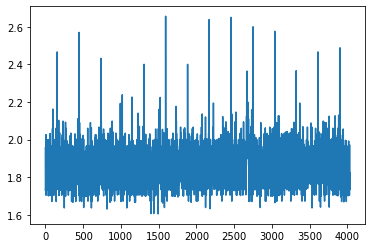

In [4]:
plt.plot(cpu['value'])

(array([1.500e+01, 2.250e+02, 5.110e+02, 1.543e+03, 8.040e+02, 2.050e+02,
        3.210e+02, 2.150e+02, 1.280e+02, 3.200e+01, 1.000e+01, 8.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 3.000e+00]),
 array([1.604 , 1.6566, 1.7092, 1.7618, 1.8144, 1.867 , 1.9196, 1.9722,
        2.0248, 2.0774, 2.13  , 2.1826, 2.2352, 2.2878, 2.3404, 2.393 ,
        2.4456, 2.4982, 2.5508, 2.6034, 2.656 ]),
 <a list of 20 Patch objects>)

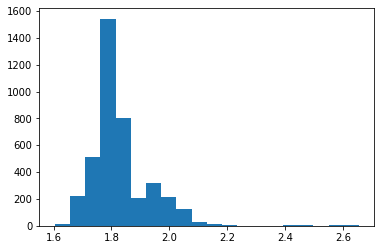

In [6]:
plt.hist(cpu['value'],bins=20)

In [10]:
cpu.value.std()*3

0.3043738137625479

In [11]:
cpu.value.mean()+cpu.value.std()*3

2.13392887328635

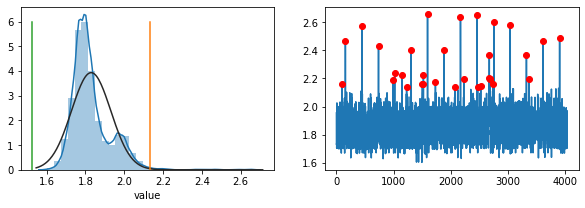

In [17]:
f, axes = plt.subplots(1, 2,figsize=(10, 3))
sns.distplot(cpu.value,bins=30,fit=norm,ax=axes[0])
#สร้าง Threshold ที่ 3SD หรือประมาณ 99.7% ของ Data ทั้งหมด
threshold = cpu.value.mean()+3*cpu.value.std()
l3sd = cpu.value.mean()-3*cpu.value.std()
u3sd = threshold
axes[0].plot([u3sd,u3sd],[0,6])
axes[0].plot([l3sd,l3sd],[0,6])
axes[1].plot(cpu.value)
anomaly = []
for  i in range(len(cpu.value)):
  if cpu.value.values[i] > threshold:
    #Remark Threshold
    axes[1].plot(i,cpu.value.values[i],'ro')
    anomaly.append(1)
  elif cpu.value.values[i] < l3sd:
    axes[1].plot(i,cpu.value.values[i],'go')
    anomaly.append(1)
  else:
    anomaly.append(0)

In [18]:
anomaly

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [20]:
cpu['anomaly']  = anomaly
cpu[cpu['anomaly'] == 1]

,timestamp,value,anomaly
98,2014-02-14 22:40:00,2.162,1
156,2014-02-15 03:30:00,2.466,1
446,2014-02-16 03:40:00,2.570,1
735,2014-02-17 03:45:00,2.432,1
992,2014-02-18 01:10:00,2.192,1
1018,2014-02-18 03:20:00,2.238,1
1148,2014-02-18 14:10:00,2.226,1
1226,2014-02-18 20:40:00,2.140,1
1307,2014-02-19 03:25:00,2.400,1
1502,2014-02-19 19:40:00,2.160,1


# ตัวอย่าง PM 2.5

In [21]:
url = 'http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt'
r = requests.get(url)
a = r.content.splitlines()
pm = []
for i in a[:]:
  tmp = re.split('\\\\t',str(i))
  if len(tmp) >= 7:
    pm.append(tmp)

In [22]:
pm

[["b'2016", '3', '3', '8', '62.9', '1.00', "0'"],
 ["b'2016", '3', '3', '9', '62.9', '1.00', "0'"],
 ["b'2016", '3', '3', '10', '55.5', '1.00', "0'"],
 ["b'2016", '3', '3', '11', '55.5', '1.00', "0'"],
 ["b'2016", '3', '3', '12', '47.9', '1.00', "0'"],
 ["b'2016", '3', '3', '13', '43.6', '1.00', "0'"],
 ["b'2016", '3', '3', '14', '28.6', '1.00', "0'"],
 ["b'2016", '3', '3', '15', '33.6', '1.00', "0'"],
 ["b'2016", '3', '3', '16', '34.8', '1.00', "0'"],
 ["b'2016", '3', '3', '17', '31.3', '1.00', "0'"],
 ["b'2016", '3', '3', '19', '42.1', '1.00', "0'"],
 ["b'2016", '3', '3', '20', '38.6', '1.00', "0'"],
 ["b'2016", '3', '3', '21', '45.5', '1.00', "0'"],
 ["b'2016", '3', '3', '22', '49.9', '1.00', "0'"],
 ["b'2016", '3', '3', '23', '44.1', '1.00', "0'"],
 ["b'2016", '3', '4', '0', '42.1', '1.00', "0'"],
 ["b'2016", '3', '4', '1', '43.1', '1.00', "0'"],
 ["b'2016", '3', '4', '2', '44.8', '1.00', "0'"],
 ["b'2016", '3', '4', '3', '37.5', '1.00', "0'"],
 ["b'2016", '3', '4', '4', '39.6', '1

In [23]:
import warnings
warnings.filterwarnings("ignore")
df = pd.DataFrame(pm,columns=['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective'])

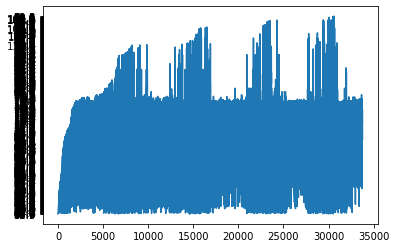

In [25]:
plt.plot(df['PM2.5'])

(array([5552., 7178., 1855., 3636., 7908., 5658.,  804.,  525.,  479.,
         164.]),
 array([  0. ,  85.4, 170.8, 256.2, 341.6, 427. , 512.4, 597.8, 683.2,
        768.6, 854. ]),
 <a list of 10 Patch objects>)

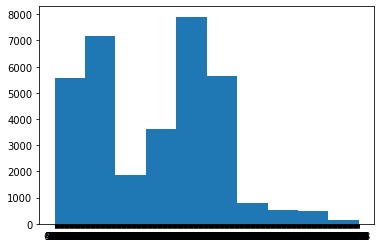

In [26]:
plt.hist(df['PM2.5'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33759 entries, 0 to 33758
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           33759 non-null  object
 1   Month          33759 non-null  object
 2   Day            33759 non-null  object
 3   UTC Hour       33759 non-null  object
 4   PM2.5          33759 non-null  object
 5   PM10_mask      33759 non-null  object
 6   Retrospective  33759 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


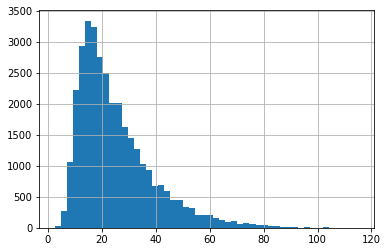

In [28]:
df2 = df.astype({'Month': 'int32','PM2.5' : 'float'})
df2['PM2.5'].hist(bins=50)

Jan


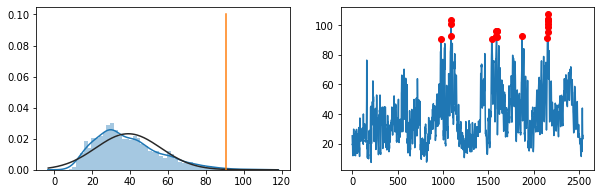

Feb


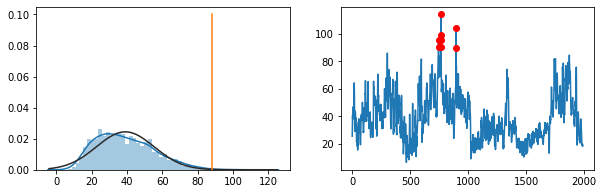

Mar


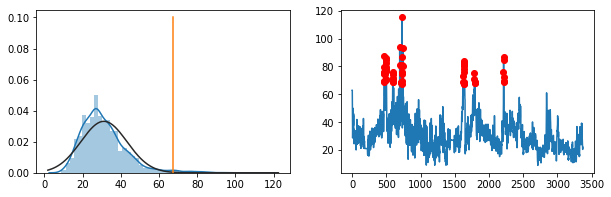

Apr


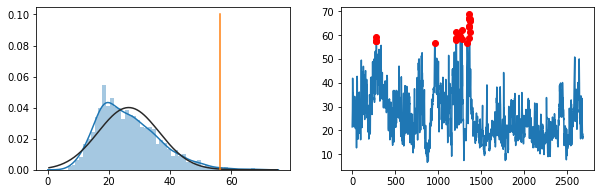

May


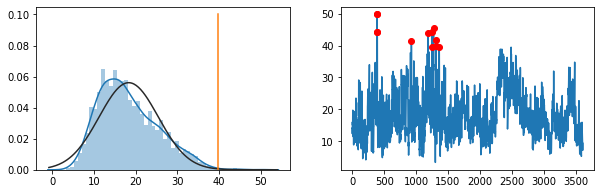

Jun


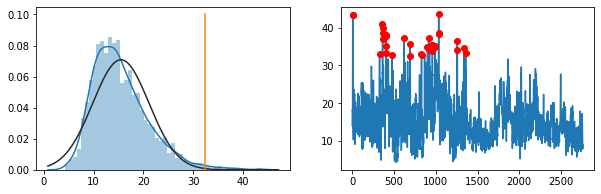

Jul


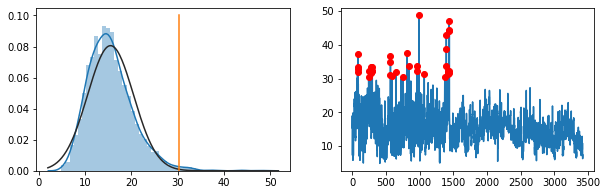

Aug


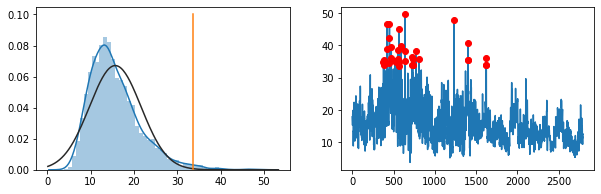

Sep


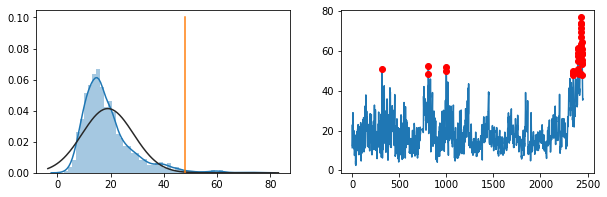

Oct


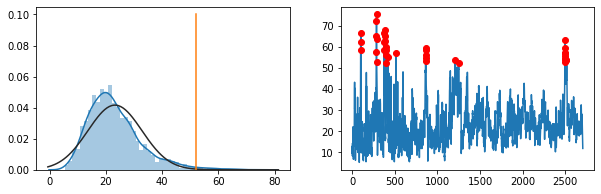

Nov


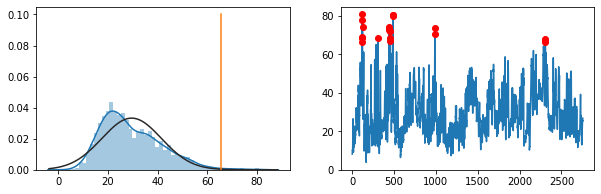

Dec


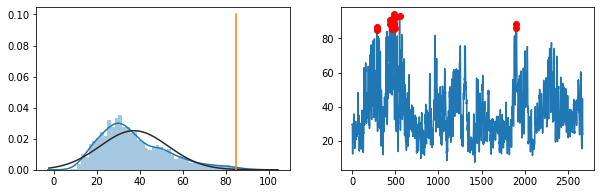

In [43]:
Month_text  = ['dc','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,13):
  print(Month_text[i])
  pm2 = df2[df2.Month == i]['PM2.5']
  f, axes = plt.subplots(1, 2,figsize=(10, 3))
  sns.distplot(pm2.values,bins=50,fit=norm,ax=axes[0])
  arr_val = pm2.values
  u3sd = arr_val.mean()+3*arr_val.std()
  l3sd = arr_val.mean()-3*arr_val.std()
  axes[0].plot([u3sd,u3sd],[0,0.1])
  axes[1].plot(arr_val)
  for  i in range(len(arr_val)):
    if arr_val[i] > u3sd or arr_val[i] < l3sd:
      axes[1].plot(i,arr_val[i],'ro')
  plt.show()